# <center>Visualizations

In [1]:
import pandas as pd
from IPython.display import Image
from IPython.display import display
from ipywidgets import interact, interactive, fixed as widgets
from IPython.display import display
from sklearn.externals import joblib
from altair import *

memes_and_likes = pd.read_csv('../../../data/eskirk/data/memes_and_likes.csv')
importances = pd.read_csv('../../../data/eskirk/data/importances.csv')
importances = importances[['0', '1']]
memes_and_likes = memes_and_likes.drop(labels=['Unnamed: 0'], axis=1)

candidate_forest_model = joblib.load('terrible_memes/candidate.pkl')
network_forest_model = joblib.load('terrible_memes/network.pkl')
importances.columns = ['phrase', 'importance']

><b>Q: Which candidate had the most memes in the dataset and where did they come from?</b>
>>Donald Trump had the most memes in the dataset, with a majority of them coming from Facebook.
>>In fact, most memes in the dataset came from Facebook (which explains the absolute lack of any quality memes)

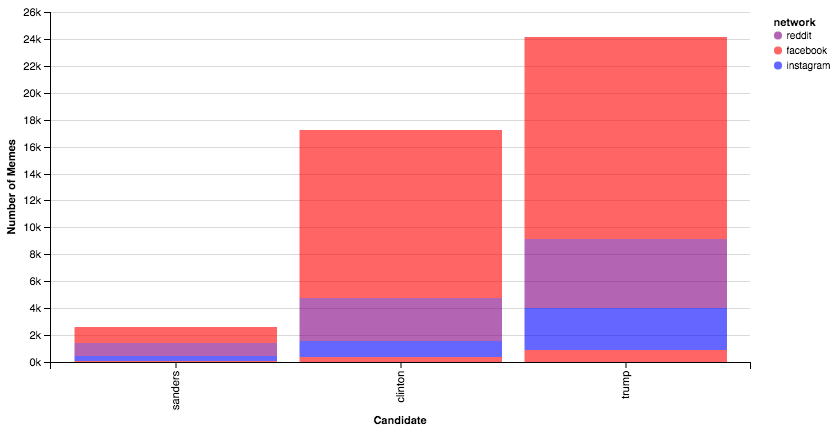

In [3]:
Chart(data=memes_and_likes, width = 700).mark_bar(opacity = 0.6).encode(
    X('candidate', title='Candidate', sort=SortField(field ='likes', op ='sum', order='ascending')),
    Y('count(*):Q', title='Number of Memes'),
    Color('network:N',
          scale=Scale(
              domain=['reddit', 'facebook', 'instagram'],
              range = ['purple', 'red', 'blue'])
         )
)

><b>Q: Which candidate had the most total likes on all of their memes?</b>
>>Donald trump had the most total likes, but that is easily explained by the fact that he has a few thousand more
>>memes than any of the other candidates in the dataset.

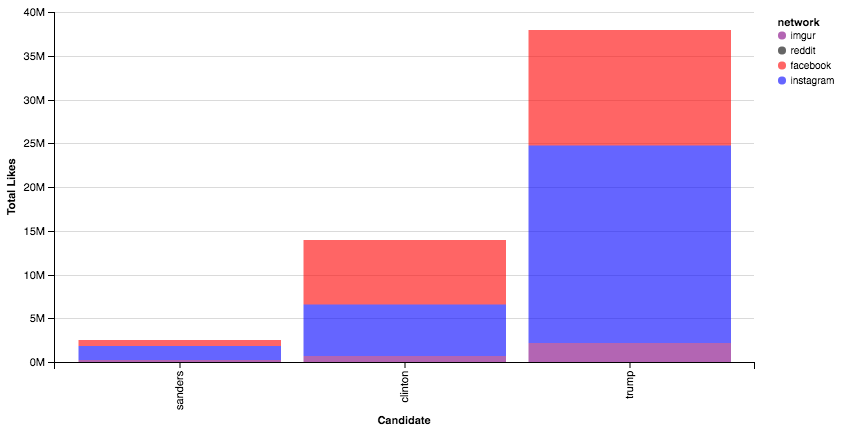

In [4]:
Chart(data=memes_and_likes, width = 700).mark_bar(opacity = 0.6).encode(
    X('candidate', title = 'Candidate', sort=SortField(field ='likes', op ='sum', order='ascending')),
    Y('sum(likes):Q', title = 'Total Likes'),
    Color('network:N',
          scale=Scale(
              domain=['imgur', 'reddit', 'facebook', 'instagram'],
              range = ['purple', 'black', 'red', 'blue'])
         )
)

><b>Q: Which candidate had the highest average likes?</b>
>>This one is interesting. Donald Trump still reigns as the Meme Master, but Bernie Sanders is edging up 
>>close behind, even passing up Hillary Clinton. Sanders was definitely killing it in the meme game, but 
>>could not quite stand up to the massive amount of shit-posting in the name of Donald Trump.

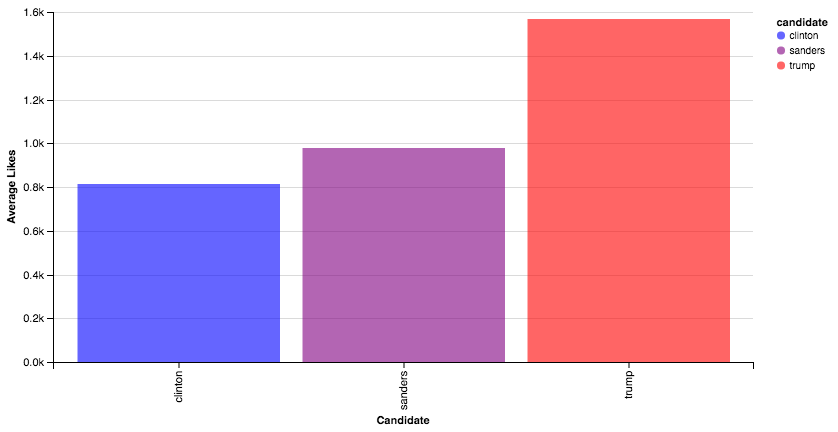

In [5]:
Chart(data=memes_and_likes, width = 700).mark_bar(opacity = 0.6).encode(
    X('candidate', title = 'Candidate', sort=SortField(field ='likes', op ='mean', order='ascending')),
    Y('mean(likes):Q', title = 'Average Likes'),
    Color(
        'candidate:N',
        scale=Scale(
            range = ['blue', 'purple', 'red']
        )
    )
)

><b>Q: What were the most important phrases in determining which candidate each meme described?</b>
>>The graph below shows that the most important feature of determining which candidate each meme describes is the
>>inclusion of the name of the candidate, obviously. So at face value, this graph does not show us too much info.
>><b>However</b> under the hood, something interesting is going on.

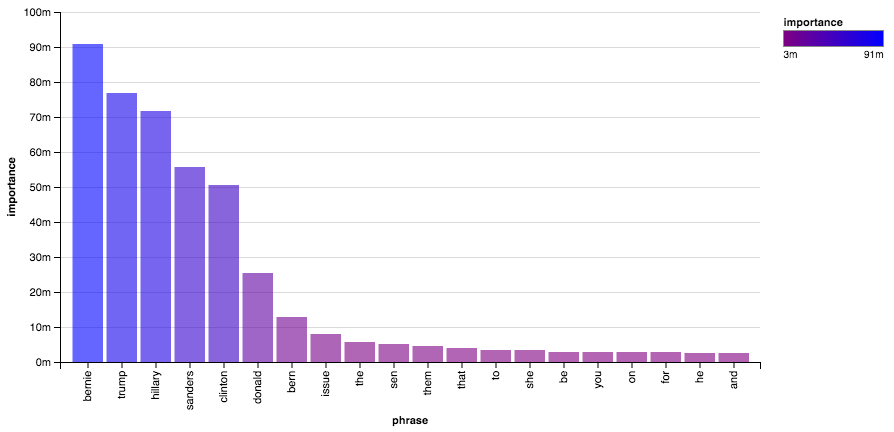

In [6]:
Chart(data=importances[:20], width = 700).mark_bar(opacity = 0.6).encode(
    X('phrase', sort=SortField(field = '1', order = 'ascending')),
    Y('importance', scale=Scale(range=[0, .1])),
    Color('importance', 
        scale = Scale(range = ['purple', 'blue']))
)

><b>Q: Were there any phrases that were highly associated with one candidate or another?</b>
>>Oh absolutely, let's look at the visualization below.

In [7]:
def visualize(phrase):
    words = [phrase]
    classes = ['clinton', 'sanders', 'trump']
    vectorized = candidate_forest_model.named_steps['tfidfvectorizer'].transform(words)
    probs = candidate_forest_model.named_steps['randomforestclassifier'].predict_proba(vectorized)
    df = pd.DataFrame(probs[0], classes)
    df.columns = ['prob']
    graph = Chart(df.reset_index(), width = 700).mark_bar(opacity = 0.6).encode(
        X('index'),
        Y('prob'),
        Color(
            'index:N',
            scale=Scale(
                range = ['blue', 'purple', 'red']
            )
        )
    )
    display(graph)

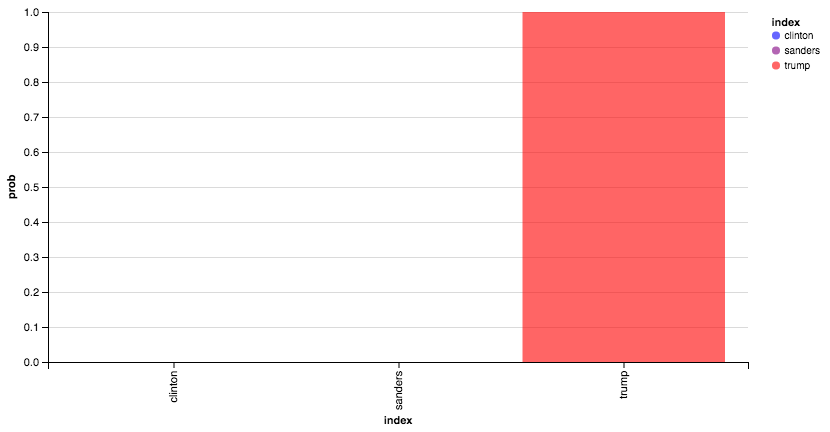

In [16]:
interact(visualize, phrase = 'make america great again', length = True);

# [04-Conclusion](04-Conclusion.ipynb)